# Validation Curves

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

In [2]:
digits = load_digits()
X, y = digits.data, digits.target

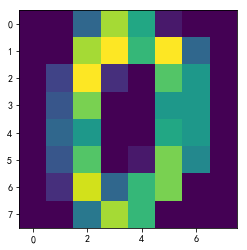

In [3]:
plt.imshow(X[0:1,].reshape(8,8))

In [4]:
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(SVC(), X, y, param_name="gamma", param_range=param_range,cv=10, scoring="accuracy", n_jobs=1)

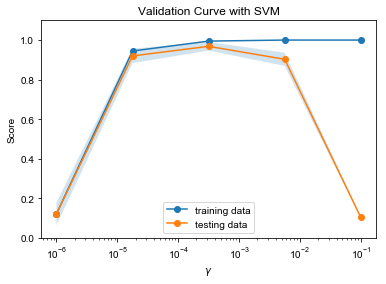

In [5]:
import matplotlib
matplotlib.rc('font', family='Arial')

plt.semilogx(param_range, train_scores.mean(axis=1), '-o', label='training data')
plt.semilogx(param_range, test_scores.mean(axis=1), '-o',label='testing data')
plt.fill_between(param_range, test_scores.mean(axis=1) - test_scores.std(axis=1),test_scores.mean(axis=1) + test_scores.std(axis=1), alpha=0.2)

plt.legend()
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

# Learning Curves

In [6]:
digits = load_digits()
X, y = digits.data, digits.target

In [7]:
from sklearn.naive_bayes import GaussianNB
estimator = GaussianNB()

In [8]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv)

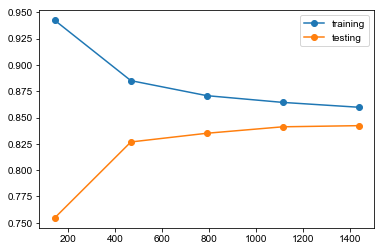

In [9]:
plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='training')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o',  label='testing')
plt.legend()

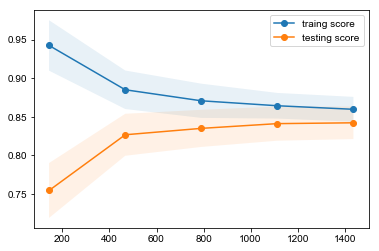

In [10]:
## 画出方差图
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.plot(train_sizes, train_mean, '-o', label='traing score')
plt.plot(train_sizes, test_mean, '-o', label='testing score')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1)

plt.legend()
plt.show()